In [16]:
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum")  # Or other appropriate channel

backend_name ='ibm_brisbane'
backend = service.backend(backend_name)

import numpy as np

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Plotting routines
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from qiskit_aer import Aer
from qiskit.compiler import transpile


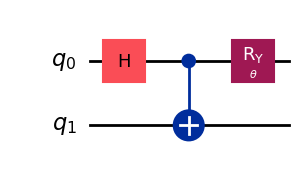

In [17]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService
#backend = least_busy()
service = QiskitRuntimeService(channel = 'ibm_quantum',token='fa6c1fd6e1d33ed21b09389e84015f16788b8ee7de800ce4a5a1f8b9c934b9cc0f145a64f9926598c14a798763f1eb58e389d6a1cfa6f143a2f8dc8271b7faa2'
)
theta = Parameter("$\\theta$")
qc = QuantumCircuit(2)
qc.h(0)  #Create a h gate on the 0 quibit
qc.cx(0, 1)  #Create a CNOT gate on 0 and 1
qc.ry(theta, 0)
#qc.cry(-2 * theta, 0, 1)
qc.draw(output = 'mpl')

In [18]:
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
backend.name

'ibm_brisbane'

In [19]:
number_of_phases = 21
phases = np.linspace(0, 2 * np.pi, number_of_phases)
# Phases need to be expressed as list of lists in order to work
individual_phases = [[ph] for ph in phases]
print (phases)

[0.         0.31415927 0.62831853 0.9424778  1.25663706 1.57079633
 1.88495559 2.19911486 2.51327412 2.82743339 3.14159265 3.45575192
 3.76991118 4.08407045 4.39822972 4.71238898 5.02654825 5.34070751
 5.65486678 5.96902604 6.28318531]


In [20]:


# <CHSH1> = <AB> - <Ab> + <aB> + <ab> -> <ZZ> - <ZX> + <XZ> + <XX>
observable1 = SparsePauliOp.from_list([("ZZ", 1), ("ZX", -1), ("XZ", 1), ("XX", 1)])

# <CHSH2> = <AB> + <Ab> - <aB> + <ab> -> <ZZ> + <ZX> - <XZ> + <XX>
observable2 = SparsePauliOp.from_list([("ZZ", 1), ("ZX", 1), ("XZ", -1), ("XX", 1)])

#from qiskit_aer import AerSimulator

#simulator = AerSimulator()

# To run on a local simulator:
# Use the StatevectorEstimator from qiskit.primitives instead.



chsh_isa_circuit = transpile(qc, backend=backend, optimization_level=3)
chsh_isa_circuit.draw(output="mpl", idle_wires=False, style="iqp")


isa_observable1 = observable1.apply_layout(layout=chsh_isa_circuit.layout)
isa_observable2 = observable2.apply_layout(layout=chsh_isa_circuit.layout)


Obv1_ZZ=(isa_observable1[0])
Obv1_ZX=(isa_observable1[1])
Obv1_XZ=(isa_observable1[2])
Obv1_XX=(isa_observable1[3])

Obv2_ZZ=(isa_observable2[0])
Obv2_ZX=(isa_observable2[1])
Obv2_XZ=(isa_observable2[2])
#print(isa_observable2[2])
Obv2_XX=(isa_observable2[3])




In [21]:
#from qiskit.primitives import StatevectorEstimator
#estimator = StatevectorEstimator()

#job_1 = estimator.run([(chsh_isa_circuit, [[Obv1_ZZ], [Obv1_ZX], [Obv1_XZ], [Obv1_XX], [Obv2_ZX], [Obv2_XZ]], phases)])

estimator = Estimator(mode=backend)

pub = (
    chsh_isa_circuit,  # ISA circuit
    [[Obv1_ZZ], [Obv1_ZX], [Obv1_XZ], [Obv1_XX], [Obv2_ZX], [Obv2_XZ]],  # ISA Observables
    phases,  # Parameter values
)

job_1 = estimator.run(pubs=[pub]).result()





AttributeError: 'PrimitiveResult' object has no attribute 'result'

In [23]:
result_1 = job_1



# Check the status
print(job_1)

PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(6, 21), dtype=float64>), stds=np.ndarray(<shape=(6, 21), dtype=float64>), ensemble_standard_error=np.ndarray(<shape=(6, 21), dtype=float64>), shape=(6, 21)), metadata={'shots': 4096, 'target_precision': 0.015625, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32})], metadata={'dynamical_decoupling': {'enable': False, 'sequence_type': 'XX', 'extra_slack_distribution': 'middle', 'scheduling_method': 'alap'}, 'twirling': {'enable_gates': False, 'enable_measure': True, 'num_randomizations': 'auto', 'shots_per_randomization': 'auto', 'interleave_randomizations': True, 'strategy': 'active-accum'}, 'resilience': {'measure_mitigation': True, 'zne_mitigation': False, 'pec_mitigation': False}, 'version': 2})


In [34]:
ab = result_1[0].data.evs[0]
minus_aB = result_1[0].data.evs[1] #Mayus stand for prime
Ab = result_1[0].data.evs[2]
AB = result_1[0].data.evs[3]

aB = result_1[0].data.evs[4]
minus_Ab = result_1[0].data.evs[5]
print('AB:', ab)
print("-A B':", minus_aB)
print("A' B:", Ab)
print("A' B':", AB)
print("A B':", aB)
print("-A' B:", minus_Ab)

S_1= ab+minus_aB+Ab+AB

S_2= ab+aB+minus_Ab+AB



AB: [ 1.03734671  0.97491639  0.82664437  0.58862876  0.30769231 -0.06633222
 -0.33500557 -0.59754738 -0.8483835  -0.99554069 -1.03790412 -1.0039019
 -0.82720178 -0.59141583 -0.32831661  0.04013378  0.33444816  0.6270903
  0.85730212  0.99554069  1.04292085]
-A B': [-0.02898551 -0.30490524 -0.62597547 -0.84280936 -0.98049052 -1.04292085
 -0.98216276 -0.80936455 -0.59364548 -0.27703456  0.00501672  0.34726867
  0.63154961  0.84280936  0.98717949  1.05183946  0.99665552  0.82831661
  0.59866221  0.31716834 -0.02787068]
A' B: [-0.01672241 -0.34280936 -0.62486065 -0.81939799 -0.97993311 -1.02675585
 -0.95540691 -0.80992196 -0.60925307 -0.29041249  0.02173913  0.30992196
  0.62095875  0.83556299  0.96822742  1.04013378  0.98829431  0.84169454
  0.60813824  0.29152731 -0.01616499]
A' B': [ 1.01226310e+00  9.81605351e-01  8.19955407e-01  5.91415831e-01
  3.39464883e-01  5.57413601e-04 -3.34448161e-01 -6.19843924e-01
 -8.40579710e-01 -9.82720178e-01 -1.02508361e+00 -9.73801561e-01
 -8.04347826

In [30]:
import numpy as np
import pandas as pd

# Your data
ab = np.array([1.03734671, 0.97491639, 0.82664437, 0.58862876, 0.30769231, -0.06633222,
                 -0.33500557, -0.59754738, -0.8483835, -0.99554069, -1.03790412, -1.0039019,
                 -0.82720178, -0.59141583, -0.32831661, 0.04013378, 0.33444816, 0.6270903,
                 0.85730212, 0.99554069, 1.04292085])

# Convert the array into a DataFrame for easy handling
df = pd.DataFrame(ab, columns=["AB"])

# Save the DataFrame to a CSV file
df.to_csv("sorted_data.csv", index=False)
print("Data saved to 'sorted_data.csv'.")


Data saved to 'sorted_data.csv'.


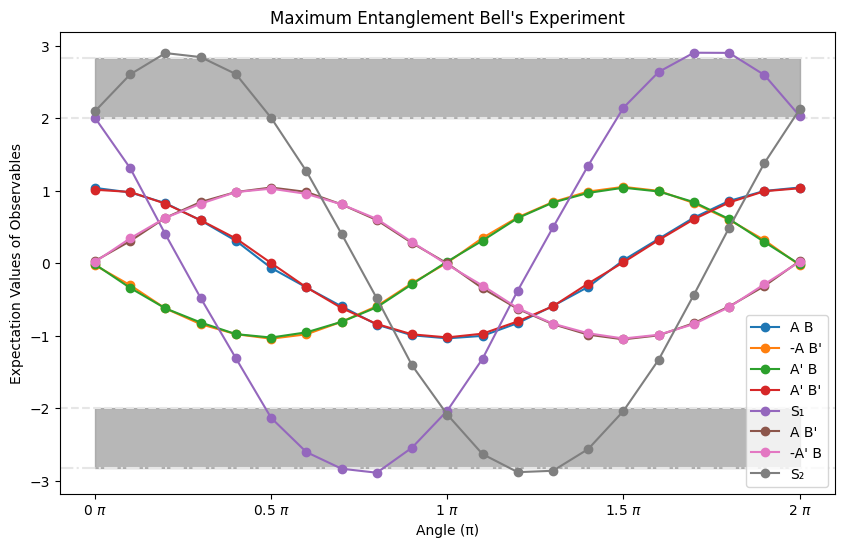

In [55]:
from sympy import symbols
fig, ax = plt.subplots(figsize=(10, 6))

# results from hardware
ax.plot(phases / np.pi, ab, "o-", label="A B", zorder=3)
ax.plot(phases / np.pi, minus_aB, "o-", label="-A B'", zorder=3)
ax.plot(phases / np.pi, Ab, "o-", label="A' B", zorder=3)
ax.plot(phases / np.pi, AB, "o-", label="A' B'", zorder=3)
ax.plot(phases / np.pi, S_1, "o-", label="S₁", zorder=3)

#ax.plot(phases / np.pi, chsh1_est_ZZ, "o-", zorder=3) #label="chsh1_est_ZZ"
ax.plot(phases / np.pi, aB, "o-", label="A B'", zorder=3)
ax.plot(phases / np.pi, minus_Ab, "o-", label="-A' B", zorder=3)
#gax.plot(phases / np.pi, chsh1_est_XX, "o-", zorder=3) #label="chsh1_est_XX",
ax.plot(phases / np.pi, S_2, "o-", label="S₂", zorder=3)

# classical bound +-2
ax.axhline(y=2, color="0.9", linestyle="--")
ax.axhline(y=-2, color="0.9", linestyle="--")

# quantum bound, +-2√2
ax.axhline(y=np.sqrt(2) * 2, color="0.9", linestyle="-.")
ax.axhline(y=-np.sqrt(2) * 2, color="0.9", linestyle="-.")
ax.fill_between(phases / np.pi, 2, 2 * np.sqrt(2), color="0.6", alpha=0.7)
ax.fill_between(phases / np.pi, -2, -2 * np.sqrt(2), color="0.6", alpha=0.7)

# set x tick labels to the unit of pi
ax.xaxis.set_major_formatter(tck.FormatStrFormatter("%g $\\pi$"))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1/2))

# set labels, and legend
plt.title("Maximum Entanglement Bell's Experiment")
plt.xlabel("Angle (π)")
plt.ylabel("Expectation Values of Observables")
plt.legend()
plt.show()

In [8]:
print(chsh_isa_circuit)

     ┌───┐     ┌──────────────┐
q_0: ┤ H ├──■──┤ Ry($\theta$) ├
     └───┘┌─┴─┐└──────────────┘
q_1: ─────┤ X ├────────────────
          └───┘                
